In [2]:
import warnings
import pandas as pd
import os

In [3]:
def load_csv_data(folder_name, file_name):
    csv_path = os.path.join(folder_name, file_name+".csv")
    return pd.read_csv(csv_path, encoding='latin-1')

In [2]:
packnames = ('lme4', 'lmerTest', 'emmeans', "geepack",'lsmeans','ARTool','phia',
             'multcomp','reshape2','rstatix','ez','dplyr','xtable','ggpubr','lazyeval')
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import StrVector
utils = importr("utils")
utils.chooseCRANmirror(ind=1)
utils.install_packages(StrVector(packnames))

ModuleNotFoundError: No module named 'rpy2'

In [6]:
%load_ext rpy2.ipython

In [7]:
%%R 
library(lsmeans)
library(emmeans)
library(ARTool)
library(phia)
library(lme4) 
library(lmerTest)
library(car) 
library(multcomp)
library(reshape2)
library(rstatix)
library(plyr)
library(ez)
library(dplyr)
library(xtable)
library(ggpubr)

Loading required package: emmeans
Welcome to emmeans.
Caution: You lose important information if you filter this package's results.
See '? untidy'
The 'lsmeans' package is now basically a front end for 'emmeans'.
Users are encouraged to switch the rest of the way.
See help('transition') for more information, including how to
convert old 'lsmeans' objects and scripts to work with 'emmeans'.
Loading required package: car
Loading required package: carData
Loading required package: Matrix

Attaching package: ‘lmerTest’

The following object is masked from ‘package:lme4’:

    lmer

The following object is masked from ‘package:stats’:

    step

Loading required package: mvtnorm
Loading required package: survival
Loading required package: TH.data
Loading required package: MASS

Attaching package: ‘TH.data’

The following object is masked from ‘package:MASS’:

    geyser


Attaching package: ‘rstatix’

The following object is masked from ‘package:MASS’:

    select

The following object is m

In [4]:
df= load_csv_data("data","evaluation_merged")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   iteration        10001 non-null  int64 
 1   puzzle_id        10001 non-null  int64 
 2   method           10001 non-null  object
 3   best_move_score  10001 non-null  int64 
 4   move_score       10001 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 390.8+ KB


In [6]:
df['score'] = df.apply(lambda x: x.best_move_score-x.move_score,axis=1)

In [7]:
df.head()

,iteration,puzzle_id,method,best_move_score,move_score,score
0,0,1,Random,195,21,174
1,1,1,Random,195,-473,668
2,2,1,Random,195,21,174
3,3,1,Random,195,-52,247
4,4,1,Random,195,-52,247


In [8]:
df['score'].min()

np.int64(-50)

In [9]:
min_row = df.iloc[df['score'].idxmin()]

print(min_row)

iteration               0
puzzle_id             100
method             Random
best_move_score        96
move_score            146
score                 -50
Name: 4950, dtype: object


In [10]:
filtered_rows = df[df['score'] < 0]

print(filtered_rows)

      iteration  puzzle_id  method  best_move_score  move_score  score
444          44          9  Random              126         130     -4
494          44         10  Random               86          89     -3
644          44         13  Random              385         397    -12
2280         30         46  Random               99         103     -4
2367         17         48  Random              130         136     -6
2384         34         48  Random              130         136     -6
4086         36         82  Random              143         164    -21
4586         36         92  Random              346         365    -19
4950          0        100  Random               96         146    -50
4974         24        100  Random               96         146    -50
4975         25        100  Random               96         146    -50
4991         41        100  Random               96         146    -50
4995         45        100  Random               96         117    -21


In [34]:
df['score'].max()

1412

In [37]:
%%R -i df

df$method = factor(df$method) # convert to nominal factor
df$puzzle_id = factor(df$puzzle_id) # convert to nominal factor

t.test(score ~ as.factor(method), data = df) 


	Welch Two Sample t-test

data:  score by as.factor(method)
t = -13.913, df = 9865.9, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Qwen:32B and group Random is not equal to 0
95 percent confidence interval:
 -88.65386 -66.75853
sample estimates:
mean in group Qwen:32B   mean in group Random 
              290.9542               368.6604 



In [35]:
%%R -i df

df$method = factor(df$method) # convert to nominal factor
df$puzzle_id = factor(df$puzzle_id) # convert to nominal factor

mart = lmer(score ~ method + (1|puzzle_id), data=df) # uses LMM
print(summary(mart)) # report anova

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: score ~ method + (1 | puzzle_id)
   Data: df

REML criterion at convergence: 128945.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-8.1291 -0.3611 -0.1289  0.1717  6.0383 

Random effects:
 Groups    Name        Variance Std.Dev.
 puzzle_id (Intercept) 56483    237.7   
 Residual              22055    148.5   
Number of obs: 10001, groups:  puzzle_id, 100

Fixed effects:
             Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)    291.03      23.86   99.77   12.20   <2e-16 ***
methodRandom    77.63       2.97 9900.00   26.14   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
methodRandm -0.062


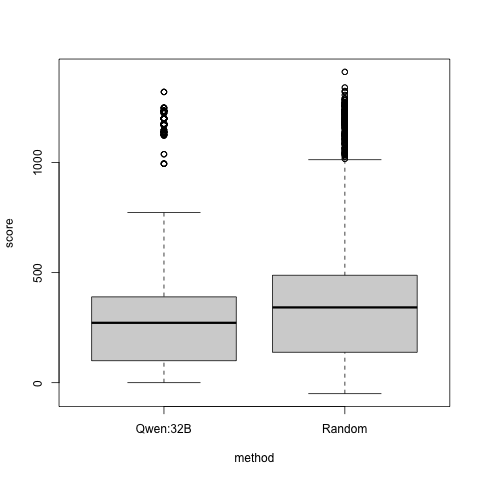

In [38]:
%%R -i df

df$method = factor(df$method) # convert to nominal factor
df$puzzle_id = factor(df$puzzle_id) # convert to nominal factor

boxplot(score ~ method,data=df)